## Homework - Project 9 DAG

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col=[0,1],
                  parse_dates = True).dropna()
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, 
                                          years[:-1]], 
                                         names =data.index.names)
data = data.reindex(multi_index)
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2010-01-01  4.374917            6.514112   
         2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2010-01-01                        3.826300     1.972000   
         2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2010-01-01                          4.907822    4.654352   
         2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2010-01-01           1404.0  
         2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  

[6840 rows x 7 columns]

In [2]:
keys = list(data.keys())[1:]
df = data.copy()
df["RGDP Per Capita"] = data["RGDP Per Capita"].groupby("ISO_Code").pct_change()
df =df[keys].diff()
df = df.rename(columns={key:key.replace(" ", "\n") for key in df}).dropna()
df

Size\nof\nGovernment  Legal\nSystem\n&\nProperty\nRights  \
ISO_Code Year                                                                   
AGO      2007-01-01             -0.103686                            0.022720   
         2008-01-01              0.068152                            0.084915   
         2009-01-01              1.797574                           -0.031306   
         2010-01-01             -1.366275                            0.050092   
         2011-01-01              0.096683                           -0.087293   
...                                   ...                                 ...   
ZWE      2010-01-01             -0.855503                            0.117071   
         2011-01-01             -0.089482                            0.117425   
         2012-01-01              0.245839                            0.069279   
         2013-01-01             -0.345364                           -0.437177   
         2014-01-01              0.108060                            0.039756   

                     Sound\nMoney  Freedom\nto\ntrade\ninternationally  \
ISO_Code Year                                                            
AGO      2007-01-01      0.392129                            -0.043488   
         2008-01-01      0.579510                            -0.427486   
         2009-01-01      0.205423                             0.123869   
         2010-01-01      0.331967                             0.377986   
         2011-01-01      0.101526                             0.020767   
...                           ...                                  ...   
ZWE      2010-01-01      1.024500                             0.041328   
         2011-01-01      2.137198                             0.458951   
         2012-01-01      1.269544                            -0.234468   
         2013-01-01      1.516788                             0.456781   
         2014-01-01      1.071268                             0.320035   

                     Regulation  RGDP\nPer\nCapita  
ISO_Code Year                                       
AGO      2007-01-01    0.218491           0.017840  
         2008-01-01   -0.302899          -0.084366  
         2009-01-01   -0.210128          -0.110907  
         2010-01-01    0.680722           0.009600  
         2011-01-01   -0.701467           0.004508  
...                         ...                ...  
ZWE      2010-01-01   -0.024469           0.017729  
         2011-01-01   -0.281474          -0.010157  
         2012-01-01   -0.711440          -0.020314  
         2013-01-01    0.186630          -0.058746  
         2014-01-01    0.139653          -0.006234  

[1808 rows x 6 columns]

In [3]:
df = pd.DataFrame(df)

In [4]:
df.corr()

,Size\nof\nGovernment,Legal\nSystem\n&\nProperty\nRights,Sound\nMoney,Freedom\nto\ntrade\ninternationally,Regulation,RGDP\nPer\nCapita
Size\nof\nGovernment,1.000000,0.056615,-0.013536,0.031969,0.052546,0.013708
Legal\nSystem\n&\nProperty\nRights,0.056615,1.000000,0.021813,0.104924,0.207265,0.068795
Sound\nMoney,-0.013536,0.021813,1.000000,0.130231,0.033420,-0.031347
Freedom\nto\ntrade\ninternationally,0.031969,0.104924,0.130231,1.000000,0.070488,0.040761
Regulation,0.052546,0.207265,0.033420,0.070488,1.000000,0.124689
RGDP\nPer\nCapita,0.013708,0.068795,-0.031347,0.040761,0.124689,1.000000


In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:     Size
of
Government   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.143
Date:                Sun, 07 Nov 2021   Prob (F-statistic):             0.0578
Time:                        23:53:13   Log-Likelihood:                -656.13
No. Observations:                1808   AIC:                             1324.
Df Residuals:                    1802   BIC:                             1357.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Legal
Sy

Lets display the residuals from this OLS regression

In [6]:
residuals

Size\nof\nGovernment  Legal\nSystem\n&\nProperty\nRights  \
ISO_Code Year                                                                   
AGO      2007-01-01             -0.114134                           -0.014037   
         2008-01-01              0.097522                            0.188195   
         2009-01-01              1.806662                           -0.041575   
         2010-01-01             -1.415532                           -0.061361   
         2011-01-01              0.132866                            0.037261   
...                                   ...                                 ...   
ZWE      2010-01-01             -0.852219                            0.141471   
         2011-01-01             -0.068811                            0.131042   
         2012-01-01              0.299726                            0.211703   
         2013-01-01             -0.324418                           -0.489596   
         2014-01-01              0.100074                           -0.016722   

                     Sound\nMoney  Freedom\nto\ntrade\ninternationally  \
ISO_Code Year                                                            
AGO      2007-01-01      0.342342                            -0.086190   
         2008-01-01      0.599599                            -0.456258   
         2009-01-01      0.149415                             0.100800   
         2010-01-01      0.146716                             0.346911   
         2011-01-01      0.082395                             0.051776   
...                           ...                                  ...   
ZWE      2010-01-01      0.950131                            -0.037762   
         2011-01-01      2.003512                             0.283006   
         2012-01-01      1.294684                            -0.317963   
         2013-01-01      1.346889                             0.381682   
         2014-01-01      0.952280                             0.220011   

                     Regulation  RGDP\nPer\nCapita  
ISO_Code Year                                       
AGO      2007-01-01    0.165175           0.021755  
         2008-01-01   -0.307282          -0.065414  
         2009-01-01   -0.247416          -0.099753  
         2010-01-01    0.651456           0.000155  
         2011-01-01   -0.729087           0.028820  
...                         ...                ...  
ZWE      2010-01-01   -0.087337           0.029747  
         2011-01-01   -0.390606           0.010584  
         2012-01-01   -0.773102           0.010629  
         2013-01-01    0.235388          -0.047080  
         2014-01-01    0.062467           0.000473  

[1808 rows x 6 columns]

In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

# cleaning up the output

,Size\nof\nGovernment,Legal\nSystem\n&\nProperty\nRights,Sound\nMoney,Freedom\nto\ntrade\ninternationally,Regulation,RGDP\nPer\nCapita
Size\nof\nGovernment,1.00,0.04,-0.02,0.03,0.04,0.00
Legal\nSystem\n&\nProperty\nRights,0.04,1.00,0.01,0.09,0.19,0.04
Sound\nMoney,-0.02,0.01,1.00,0.13,0.03,-0.04
Freedom\nto\ntrade\ninternationally,0.03,0.09,0.13,1.00,0.04,0.03
Regulation,0.04,0.19,0.03,0.04,1.00,0.11
RGDP\nPer\nCapita,0.00,0.04,-0.04,0.03,0.11,1.00


## Correlations

In [8]:
import pingouin
df.pcorr().round(2)

,Size\nof\nGovernment,Legal\nSystem\n&\nProperty\nRights,Sound\nMoney,Freedom\nto\ntrade\ninternationally,Regulation,RGDP\nPer\nCapita
Size\nof\nGovernment,1.00,0.04,-0.02,0.03,0.04,0.00
Legal\nSystem\n&\nProperty\nRights,0.04,1.00,0.01,0.09,0.19,0.04
Sound\nMoney,-0.02,0.01,1.00,0.13,0.03,-0.04
Freedom\nto\ntrade\ninternationally,0.03,0.09,0.13,1.00,0.04,0.03
Regulation,0.04,0.19,0.03,0.04,1.00,0.11
RGDP\nPer\nCapita,0.00,0.04,-0.04,0.03,0.11,1.00


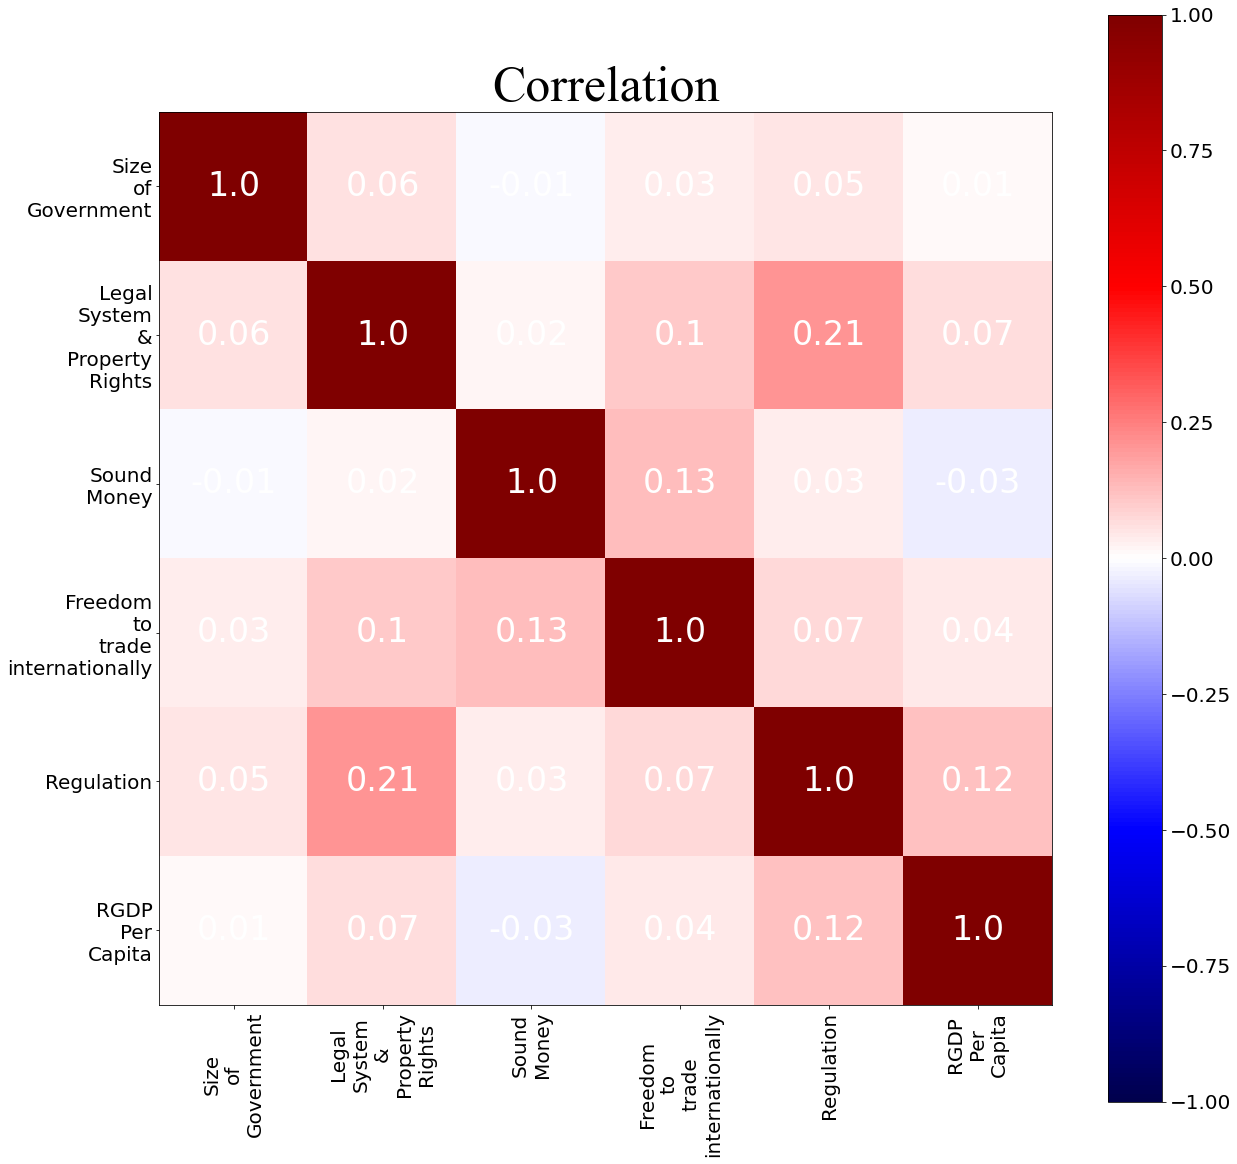

In [9]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None)

## Partial Correlations

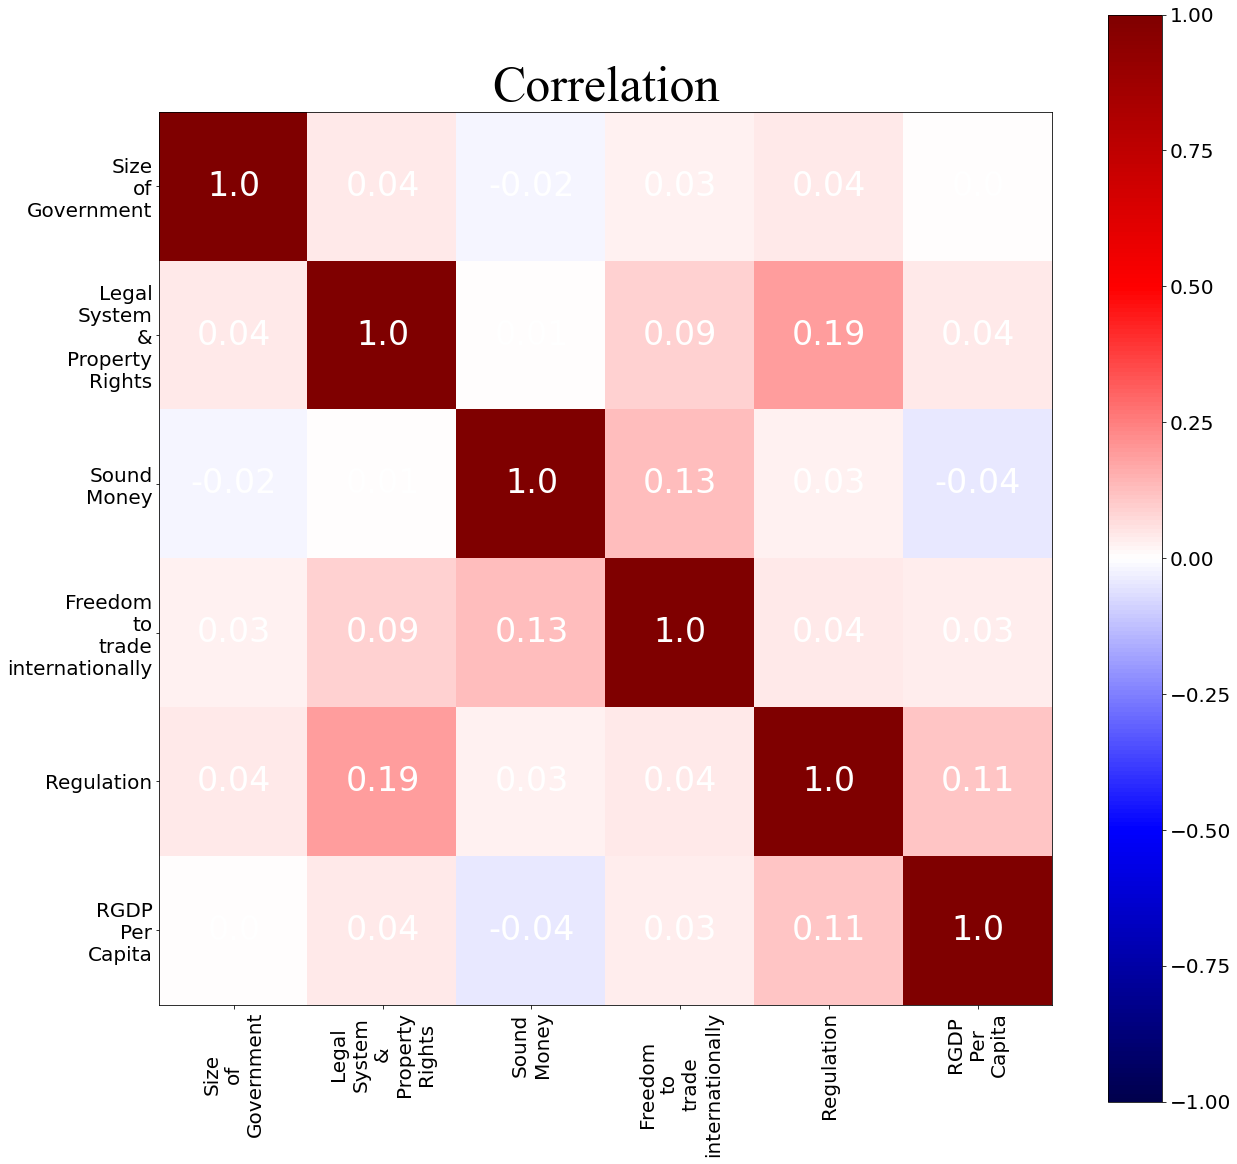

In [10]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None)

In [11]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:     Size
of
Government   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              3.548
Date:                Sun, 07 Nov 2021   Prob (F-statistic):                      0.0598
Time:                        23:53:17   Log-Likelihood:                         -654.36
No. Observations:                1808   AIC:                                      1311.
Df Residuals:                    1807   BIC:                                      1316.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

                                 OLS Regression Results                                
Dep. Variable:             Regulation   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              2.940
Date:                Sun, 07 Nov 2021   Prob (F-statistic):                      0.0866
Time:                        23:53:17   Log-Likelihood:                         -249.97
No. Observations:                1808   AIC:                                      501.9
Df Residuals:                    1807   BIC:                                      507.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

,Size\nof\nGovernment,Legal\nSystem\n&\nProperty\nRights,Sound\nMoney,Freedom\nto\ntrade\ninternationally,Regulation,RGDP\nPer\nCapita
Size\nof\nGovernment,NaN,0.06,0.42,0.26,0.09,0.87
Legal\nSystem\n&\nProperty\nRights,0.06,NaN,0.80,0.00,0.00,0.08
Sound\nMoney,0.42,0.80,NaN,0.00,0.23,0.09
Freedom\nto\ntrade\ninternationally,0.26,0.00,0.00,NaN,0.08,0.16
Regulation,0.09,0.00,0.23,0.08,NaN,0.00
RGDP\nPer\nCapita,0.87,0.08,0.09,0.16,0.00,NaN


In [12]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'Size\nof\nGovernment': ['Legal\nSystem\n&\nProperty\nRights',
  'Sound\nMoney',
  'Freedom\nto\ntrade\ninternationally',
  'Regulation',
  'RGDP\nPer\nCapita'],
 'Legal\nSystem\n&\nProperty\nRights': ['Size\nof\nGovernment',
  'Sound\nMoney',
  'Freedom\nto\ntrade\ninternationally',
  'Regulation',
  'RGDP\nPer\nCapita'],
 'Sound\nMoney': ['Size\nof\nGovernment',
  'Legal\nSystem\n&\nProperty\nRights',
  'Freedom\nto\ntrade\ninternationally',
  'Regulation',
  'RGDP\nPer\nCapita'],
 'Freedom\nto\ntrade\ninternationally': ['Size\nof\nGovernment',
  'Legal\nSystem\n&\nProperty\nRights',
  'Sound\nMoney',
  'Regulation',
  'RGDP\nPer\nCapita'],
 'Regulation': ['Size\nof\nGovernment',
  'Legal\nSystem\n&\nProperty\nRights',
  'Sound\nMoney',
  'Freedom\nto\ntrade\ninternationally',
  'RGDP\nPer\nCapita'],
 'RGDP\nPer\nCapita': ['Size\nof\nGovernment',
  'Legal\nSystem\n&\nProperty\nRights',
  'Sound\nMoney',
  'Freedom\nto\ntrade\ninternationally',
  'Regulation']}

In [13]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

Legal
System
&
Property
Rights Freedom
to
trade
internationally []
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGovernment']
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGovernment', 'Sound\nMoney']
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGovernment', 'Sound\nMoney', 'Regulation']
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGovernment', 'Sound\nMoney']
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGovernment', 'Sound\nMoney', 'RGDP\nPer\nCapita']
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGovernment']
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGovernment', 'Regulation']
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGovernment', 'Regulation', 'Sound\nMoney']
Legal
System
&
Property
Rights Freedom
to
trade
internationally ['Size\nof\nGo

Legal
System
&
Property
Rights Regulation ['Freedom\nto\ntrade\ninternationally']
Legal
System
&
Property
Rights Regulation ['Freedom\nto\ntrade\ninternationally', 'RGDP\nPer\nCapita']
Legal
System
&
Property
Rights Regulation ['Freedom\nto\ntrade\ninternationally', 'RGDP\nPer\nCapita', 'Size\nof\nGovernment']
Legal
System
&
Property
Rights Regulation ['Freedom\nto\ntrade\ninternationally', 'RGDP\nPer\nCapita']
Legal
System
&
Property
Rights Regulation ['Freedom\nto\ntrade\ninternationally', 'RGDP\nPer\nCapita', 'Sound\nMoney']
Legal
System
&
Property
Rights Regulation []
Legal
System
&
Property
Rights Regulation ['RGDP\nPer\nCapita']
Legal
System
&
Property
Rights Regulation ['RGDP\nPer\nCapita', 'Size\nof\nGovernment']
Legal
System
&
Property
Rights Regulation ['RGDP\nPer\nCapita', 'Size\nof\nGovernment', 'Sound\nMoney']
Legal
System
&
Property
Rights Regulation ['RGDP\nPer\nCapita', 'Size\nof\nGovernment']
Legal
System
&
Property
Rights Regulation ['RGDP\nPer\nCapita', 'Size\nof\nGo

internationally Legal
System
&
Property
Rights []
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment']
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment', 'Sound\nMoney']
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment', 'Sound\nMoney', 'Regulation']
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment', 'Sound\nMoney']
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment', 'Sound\nMoney', 'RGDP\nPer\nCapita']
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment']
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment', 'Regulation']
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment', 'Regulation', 'Sound\nMoney']
Freedom
to
trade
internationally Legal
System
&
Property
Rights ['Size\nof\nGovernment', 'Regul

Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita', 'Size\nof\nGovernment']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita', 'Size\nof\nGovernment', 'Legal\nSystem\n&\nProperty\nRights']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita', 'Size\nof\nGovernment']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita', 'Size\nof\nGovernment', 'Regulation']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita', 'Legal\nSystem\n&\nProperty\nRights']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita', 'Legal\nSystem\n&\nProperty\nRights', 'Size\nof\nGovernment']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita', 'Legal\nSystem\n&\nProperty\nRights']
Freedom
to
trade
internationally Sound
Money ['RGDP\nPer\nCapita', 'Legal\nSystem\n&\nProperty\nRights', 'Regul

Regulation RGDP
Per
Capita ['Sound\nMoney', 'Legal\nSystem\n&\nProperty\nRights']
Regulation RGDP
Per
Capita ['Sound\nMoney', 'Legal\nSystem\n&\nProperty\nRights', 'Size\nof\nGovernment']
Regulation RGDP
Per
Capita ['Sound\nMoney', 'Legal\nSystem\n&\nProperty\nRights']
Regulation RGDP
Per
Capita ['Sound\nMoney', 'Legal\nSystem\n&\nProperty\nRights', 'Freedom\nto\ntrade\ninternationally']
Regulation RGDP
Per
Capita ['Sound\nMoney']
Regulation RGDP
Per
Capita ['Sound\nMoney', 'Freedom\nto\ntrade\ninternationally']
Regulation RGDP
Per
Capita ['Sound\nMoney', 'Freedom\nto\ntrade\ninternationally', 'Size\nof\nGovernment']
Regulation RGDP
Per
Capita ['Sound\nMoney', 'Freedom\nto\ntrade\ninternationally']
Regulation RGDP
Per
Capita ['Sound\nMoney', 'Freedom\nto\ntrade\ninternationally', 'Legal\nSystem\n&\nProperty\nRights']
Regulation RGDP
Per
Capita []
Regulation RGDP
Per
Capita ['Freedom\nto\ntrade\ninternationally']
Regulation RGDP
Per
Capita ['Freedom\nto\ntrade\ninternationally', 'Size\n

{'Size\nof\nGovernment': [],
 'Legal\nSystem\n&\nProperty\nRights': ['Freedom\nto\ntrade\ninternationally',
  'Regulation'],
 'Sound\nMoney': ['Freedom\nto\ntrade\ninternationally'],
 'Freedom\nto\ntrade\ninternationally': ['Legal\nSystem\n&\nProperty\nRights',
  'Sound\nMoney'],
 'Regulation': ['Legal\nSystem\n&\nProperty\nRights', 'RGDP\nPer\nCapita'],
 'RGDP\nPer\nCapita': ['Regulation']}

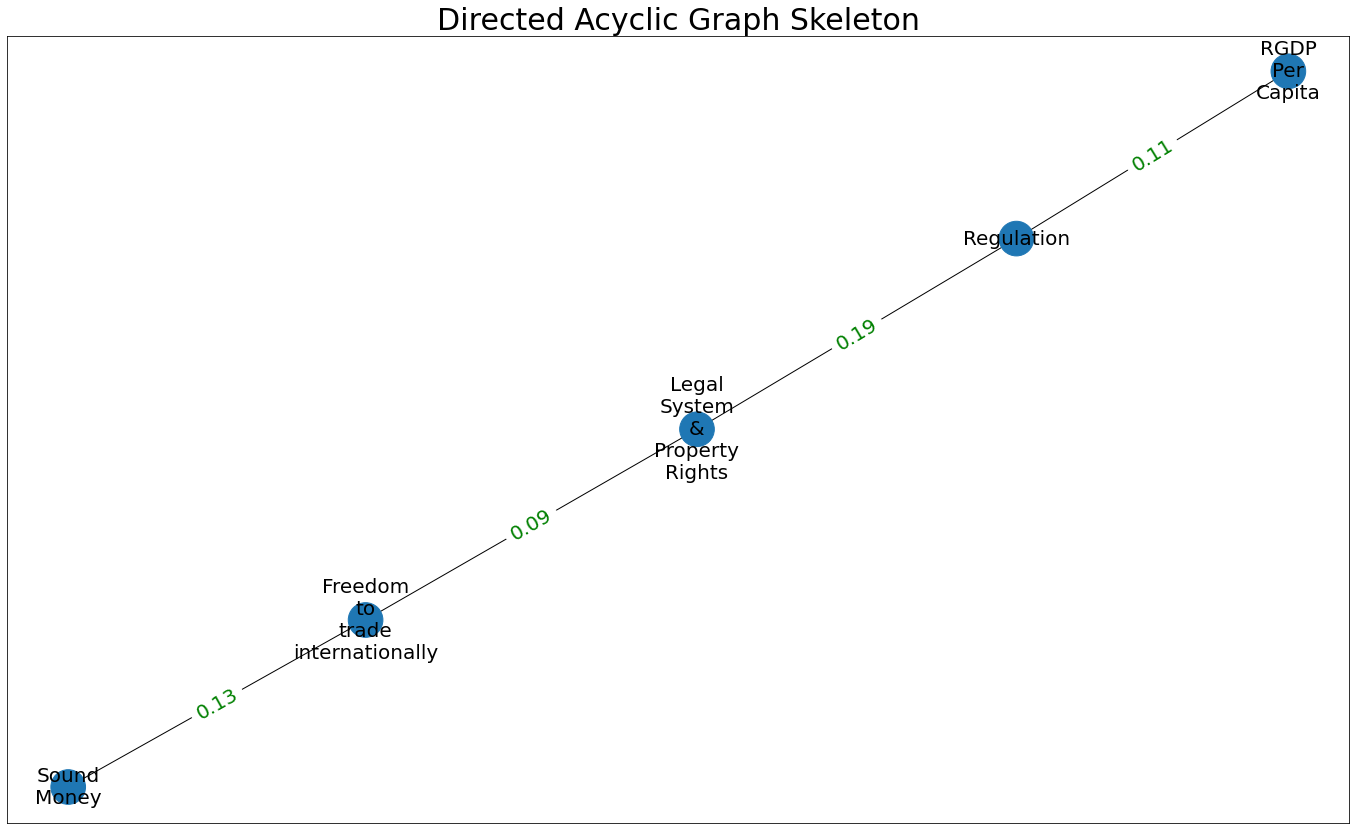

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "Directed Acyclic Graph Skeleton"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1200,
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "k",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size=20)    
    
 
    plt.show()
graph_DAG(undirected_graph, df)

In [15]:
from pgmpy.estimators import PC
c= PC(df)
max_cond_vars = len(df.keys()) - 2
model = c.estimate(return_type = "dag",
                  variant = "parallel",
                  significance = p_val,
                  max_cond_vars = max_cond_vars,
                  ci_test = "pearsonr")
edges = model.edges()
edges

  0%|          | 0/4 [00:00<?, ?it/s]

OutEdgeView([('Legal\nSystem\n&\nProperty\nRights', 'Freedom\nto\ntrade\ninternationally'), ('Sound\nMoney', 'Freedom\nto\ntrade\ninternationally'), ('Regulation', 'Legal\nSystem\n&\nProperty\nRights'), ('Regulation', 'RGDP\nPer\nCapita')])

## Directed Acyclic Graph with D-Seperation

keep control: Sound
Money
('Legal\nSystem\n&\nProperty\nRights', 'Freedom\nto\ntrade\ninternationally') ['Sound\nMoney']
keep control: Legal
System
&
Property
Rights
('Sound\nMoney', 'Freedom\nto\ntrade\ninternationally') ['Legal\nSystem\n&\nProperty\nRights']
('Regulation', 'Legal\nSystem\n&\nProperty\nRights') []
('Regulation', 'RGDP\nPer\nCapita') []


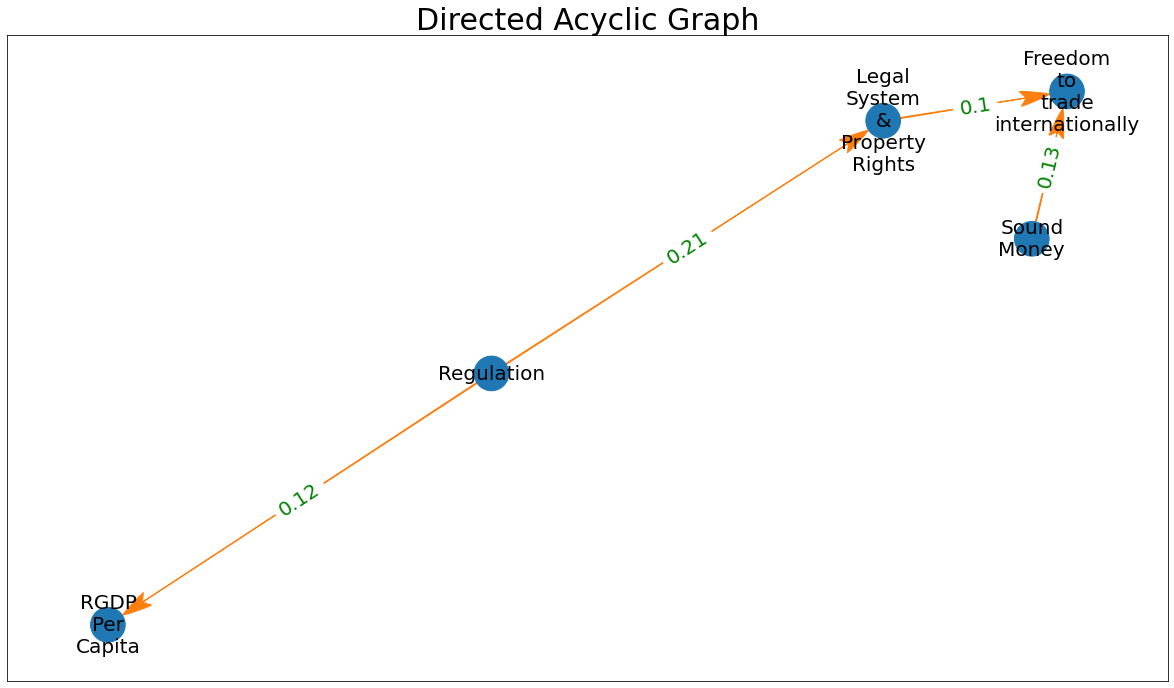

In [28]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr().round(2)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                    pos,
                    node_color = color_map,
                    node_size = 1200,
                    font_color = "k",
                    font_size = 20,
                    alpha = 1,
                    width = 1,
                    edge_color = "C1",
                    arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width = .1"))
    
    nx.draw_networkx_edge_labels(graph,
                                pos,
                                edge_labels = edge_labels,
                                font_color = "green",
                                font_size = 20)
    
    plt.show()
graph_DAG(edges, df, title = "Directed Acyclic Graph")

## Directed Acyclic Graph with Partial Correlations

keep control: Sound
Money
('Legal\nSystem\n&\nProperty\nRights', 'Freedom\nto\ntrade\ninternationally') ['Sound\nMoney']


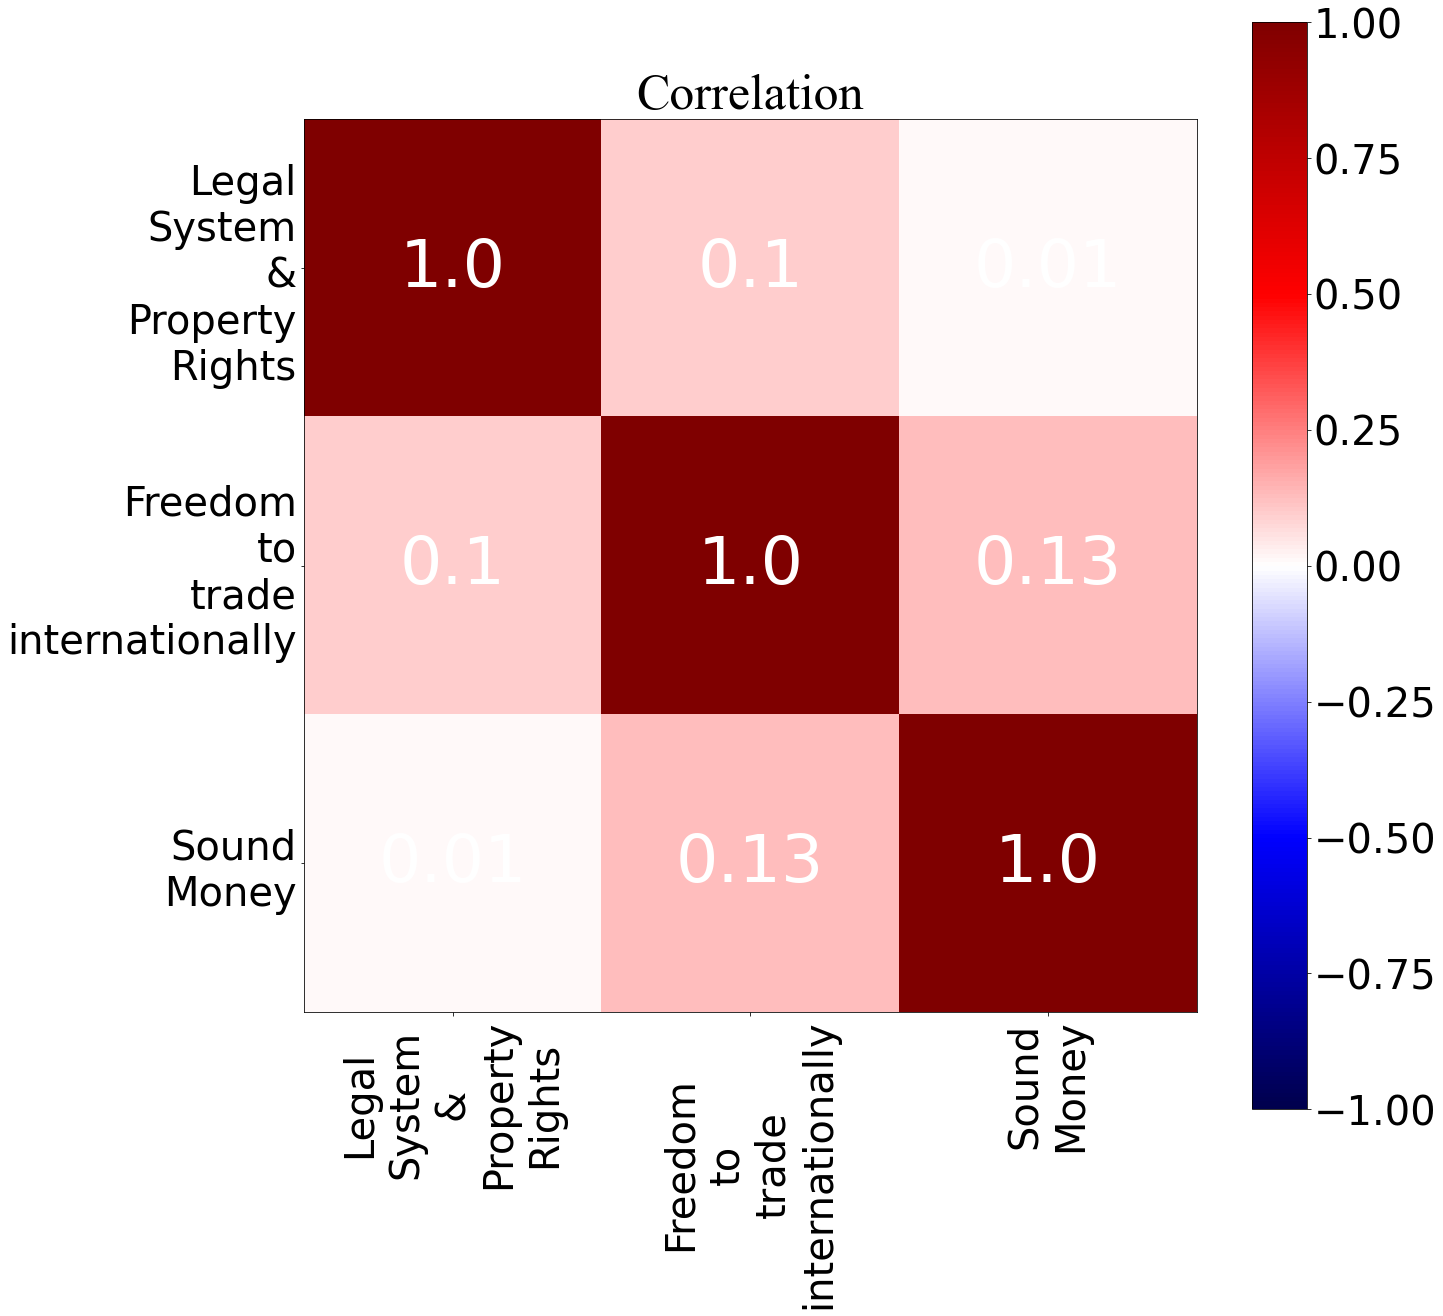

keep control: Legal
System
&
Property
Rights
('Sound\nMoney', 'Freedom\nto\ntrade\ninternationally') ['Legal\nSystem\n&\nProperty\nRights']


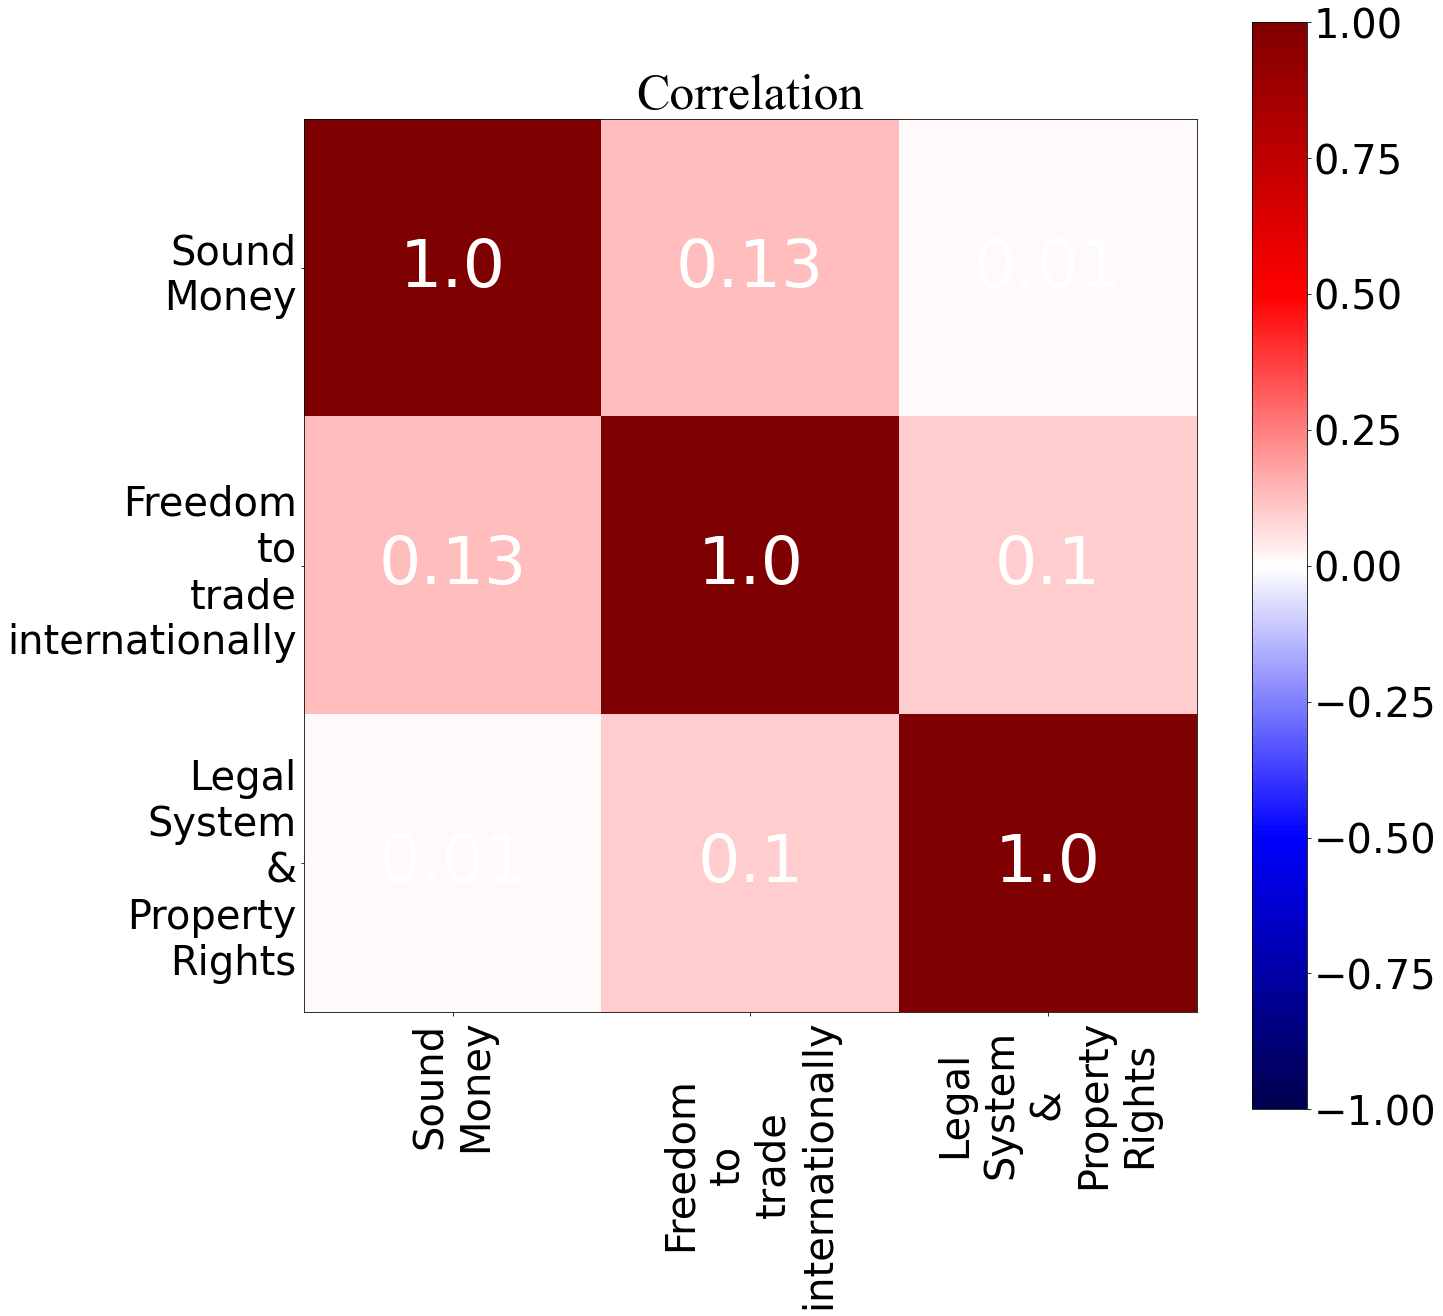

('Regulation', 'Legal\nSystem\n&\nProperty\nRights') []


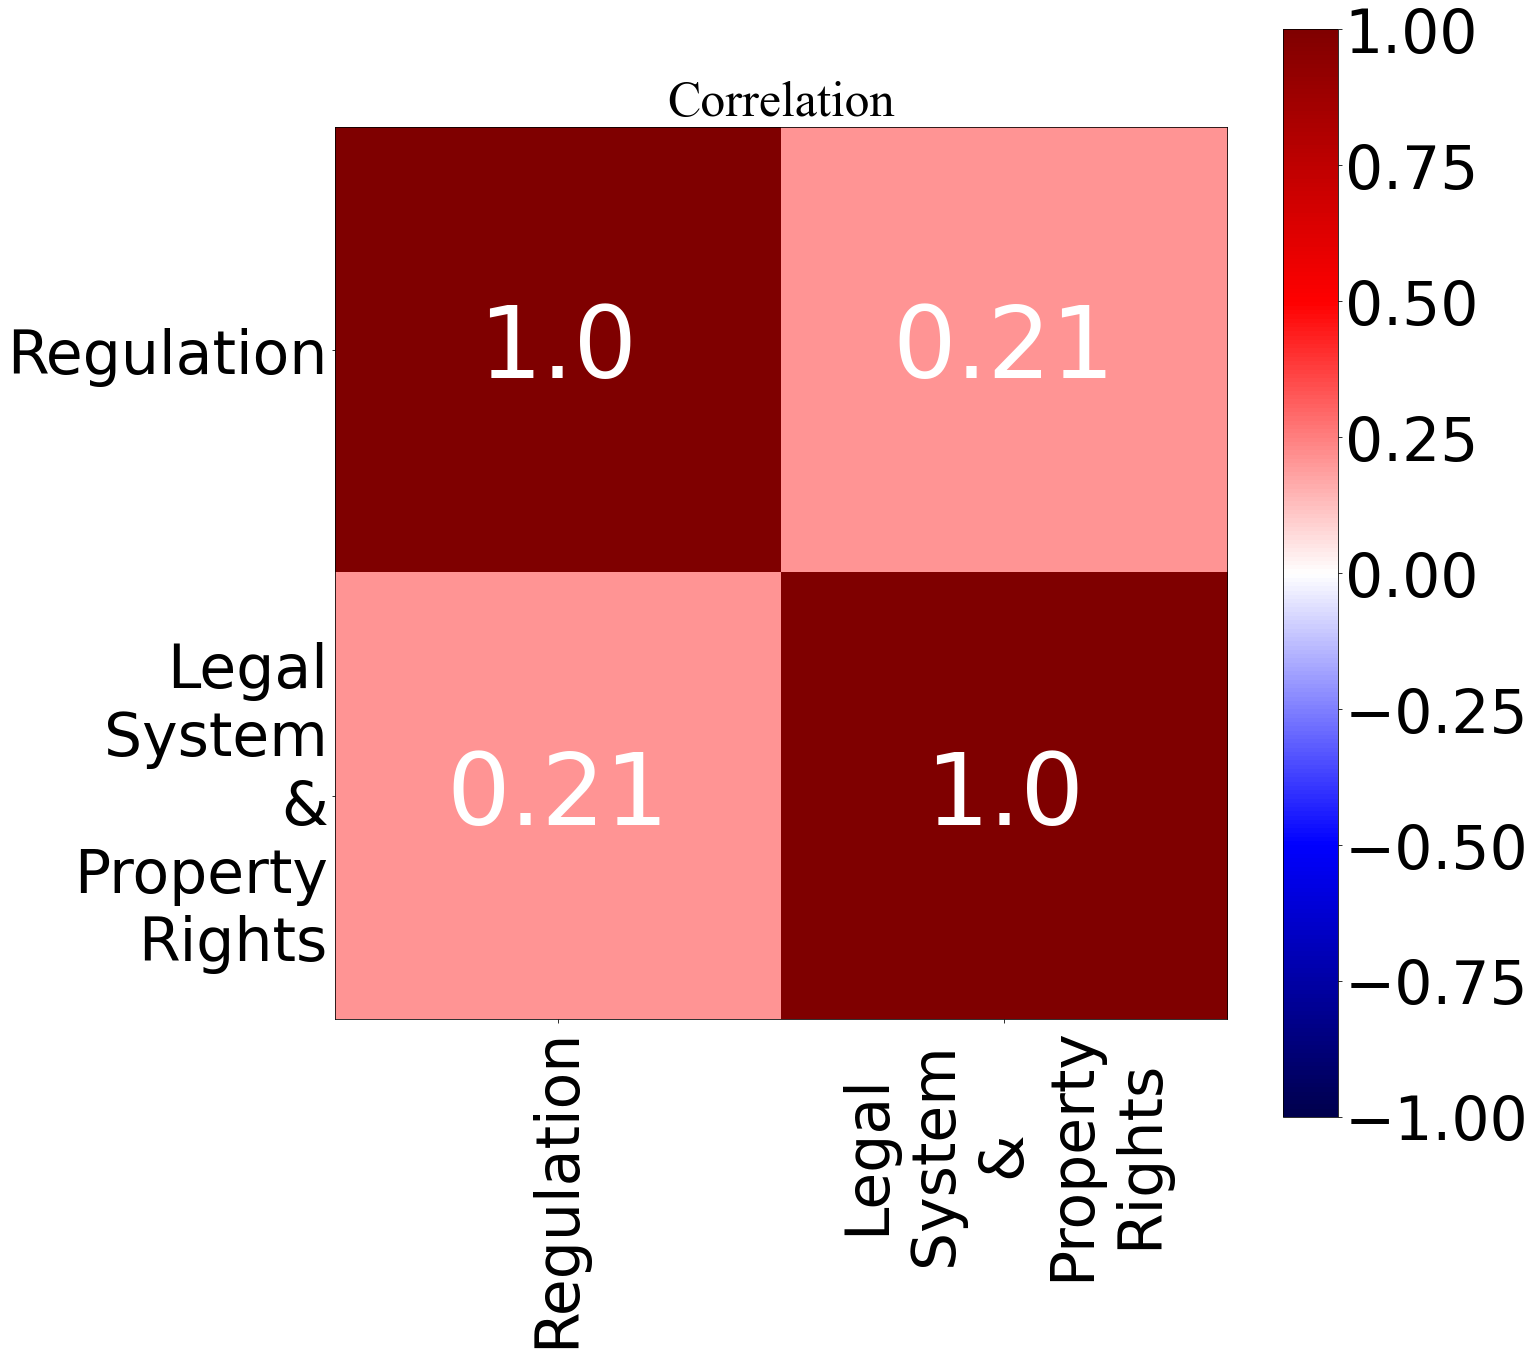

('Regulation', 'RGDP\nPer\nCapita') []


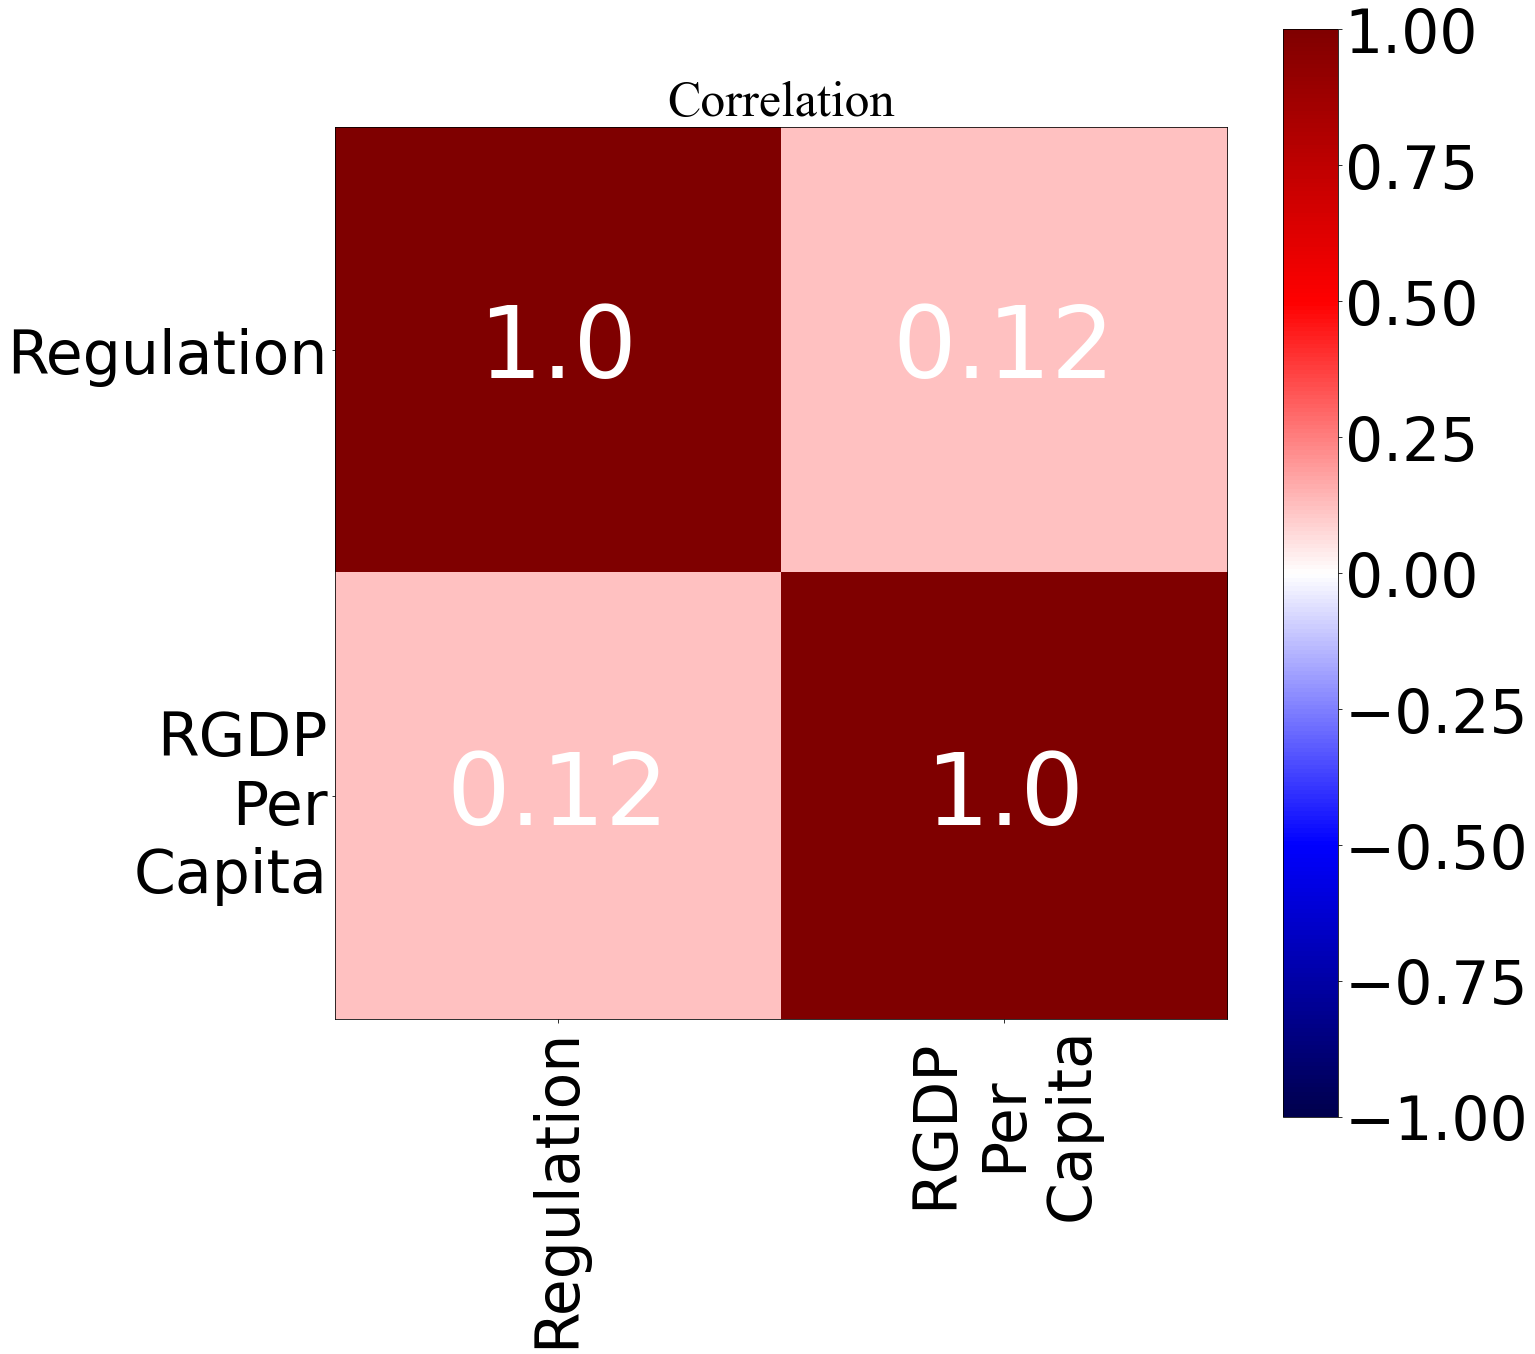

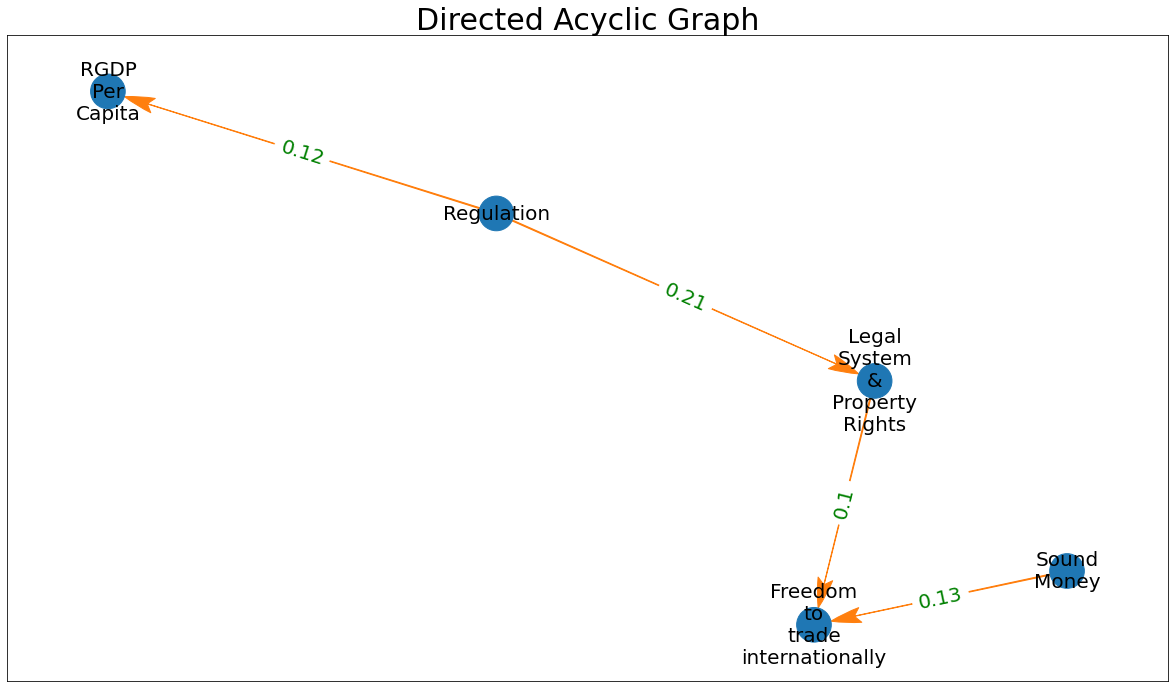

In [34]:
def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr().round(2)
        corr_matrix_heatmap(pcorr, save_fig = False, pp = None)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                    pos,
                    node_color = color_map,
                    node_size = 1200,
                    font_color = "k",
                    font_size = 20,
                    alpha = 1,
                    width = 1,
                    edge_color = "C1",
                    arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width = .1"))
    
    nx.draw_networkx_edge_labels(graph,
                                pos,
                                edge_labels = edge_labels,
                                font_color = "green",
                                font_size = 20)
    
    plt.show()
graph_DAG(edges, df, title = "Directed Acyclic Graph")

End of Project 9 homework